# <font color= blue>Investment Analysis For 'Spark Funds'</font>
___By: Divyam Kumar___
- __Business Objective:__
    The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing.
- __Goals:__ 
    1. `Investment type analysis` : Comparing the typical investment amounts in the venture, seed, angel, private equity etc.
    2. `Country analysis` : Comparing the typical investment amounts in the venture, seed, angel, private equity etc.
    3. `Sector analysis` : Understanding the distribution of investments across the eight main sectors.
- __Spark Funds has two minor constraints for investments:__
    1. It wants to <font color=brown>invest between 5 to 15 million USD per round of investment</font>
    2. It wants to invest only in <font color=brown>English-speaking countries</font> because of the ease of communication with the companies it would          invest in
- __Data Sourcing:__
    We have taken real investment data from <font color=brown>__crunchbase.com__</font>


## STEP 1 : Data Understanding and Preparation

In [1]:
# import numpy, pandas, matplotlib, and seaborn
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Load the Data Sets and understand it
1. __Company details:__


In [2]:
# Used encoding = 'latin1' to resolve UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25:invalid start byte
companies = pd.read_csv("companies.csv",encoding = 'ISO-8859-1')

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Yr-Mrkt,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
companies.shape

(66368, 10)

In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


2. __Funding round details:__

In [8]:
# Used encoding = 'latin1' to resolve UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25:invalid start byte
rounds2 = pd.read_csv("rounds2.csv",encoding = 'ISO-8859-1')

In [9]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [11]:
rounds2.shape

(114949, 6)

In [12]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


3. __Sector Classification:__

In [14]:
mapping = pd.read_csv("mapping.csv", encoding="ISO-8859-1")

In [15]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [16]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
mapping.shape

(688, 10)

In [18]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [19]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


__How many unique companies are present in rounds2?__

In [20]:
# Convert "company_permalink" attribute into lower case in both the dataframe for further analysis
companies["permalink"] = companies["permalink"].str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [21]:
unique_company_counts_rounds2 = rounds2["company_permalink"].nunique()
print("Number of unique companies present in rounds2 dataframe is : {}".format(unique_company_counts_rounds2))

# we could use describe() method also to get the count of unique values directly
rounds2.describe(include='all')

Number of unique companies present in rounds2 dataframe is : 66370


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,66370,114949,14,8,5033,NaN
top,/organization/solarflare,/funding-round/d74d7315cc93ddd7adbe822913d54757,venture,A,01-01-2014,NaN
freq,19,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


__How many unique companies are present in companies?__

In [22]:
unique_company_counts_companies = companies["permalink"].nunique()
print("Number of unique companies present in companies dataframe is : {}".format(unique_company_counts_companies))

# we could use describe() method also to get the count of unique values directly
companies.describe(include='all')

Number of unique companies present in companies dataframe is : 66368


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/textingly,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


### Prepare the Data Set

__Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame__

In [23]:
# Merge the two dataframes into a "master_frame" using right outer join on common column="company_permalink" and "permalink"
master_frame = pd.merge(companies,rounds2, how = 'right', left_on = 'permalink', right_on = 'company_permalink')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114941 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

## STEP 2 : Data Cleaning and Manipulation

### Deal with Null Values

In [24]:
# Check the null values
master_frame.isnull().sum()

permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [25]:
# Check NaN values per column expressed as % of total number of values present
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [26]:
'''raised_amount_usd' is a required column for analysis. Null values in this field can either be deleted or imputed
statistically. Here, we choose to remove these values for analysis as it accounts for 17.39% of the total raised_amount_usd.'''

master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [27]:
# Check NaN values per column expressed as % of total number of values present
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [28]:
'''The missing data in the columns: 'funding_round_code', 'founded_at', 'homepage_url' which are 70.34%, 16.81%, and 4.56% of
the total data are not required for this analysis. Hense, droping these columns.'''

master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [29]:
# Check NaN values per column expressed as % of total number of values present
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [30]:
'''The columns, country_code and category_list are needed for the analysis. Therefore removing rows with null values
in these columns.'''

master_frame = master_frame[~(master_frame['country_code'].isnull())]

master_frame = master_frame[~(master_frame['category_list'].isnull())]

In [31]:
# Check NaN values per column expressed as % of total number of values present
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

We can leave the other null values as they are with very low percentage and are not a part of this analysis. Such records could be removed but we decided to leave them as they will not impact the analysis.

## STEP 3 : Data Analysis

### 1) Funding Type Analysis

__Identify which investment type is the most suitable for Spark Funds.__

In [32]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

There are total 14 unique investment types. As specified, Spark Funds wants to choose one of the four investment types (__seed, angel, venture, and private_equity__) for each potential investment they will make.
Hence, discarding other investment types.

In [33]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

In [34]:
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [35]:
# Finding the average raised_amount_USD for each of the investment types
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

In [36]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, investment type which is the most suitable for it would be clearly __"Venture Type"__ 

In [37]:
# filter the data so it only contains the chosen investment type
venture_invest_frame = master_frame[master_frame['funding_round_type']=='venture']

### 2) Country Analysis

Spark Funds wants to see the __top nine countries__ which have received the __highest total funding__ (across ALL sectors for the chosen investment type)

In [38]:
venture_invest_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

 Make a data frame named __top9__ with the top nine countries (based on the total investment amount each country has received)

In [39]:
top9 = venture_invest_frame[venture_invest_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [40]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44118 entries, 0 to 114934
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                44118 non-null  object 
 1   name                     44118 non-null  object 
 2   category_list            44118 non-null  object 
 3   status                   44118 non-null  object 
 4   country_code             44118 non-null  object 
 5   state_code               43833 non-null  object 
 6   region                   43672 non-null  object 
 7   city                     43672 non-null  object 
 8   company_permalink        44118 non-null  object 
 9   funding_round_permalink  44118 non-null  object 
 10  funding_round_type       44118 non-null  object 
 11  funded_at                44118 non-null  object 
 12  raised_amount_usd        44118 non-null  float64
dtypes: float64(1), object(12)
memory usage: 4.7+ MB


### 3) Sector Analysis 1

Extract the __primary sector__ of each category list from the category_list column of top9 dataframe<br>
According to the business rule the first string before the vertical bar( | ) will be considered the primary sector<br>
Hence, create a new column ___primary_sector___ to store this information in the Dataframe.

In [41]:
top9['primary_sector'] = top9['category_list'].apply(lambda x : x.split('|')[0])

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44118 entries, 0 to 114934
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                44118 non-null  object 
 1   name                     44118 non-null  object 
 2   category_list            44118 non-null  object 
 3   status                   44118 non-null  object 
 4   country_code             44118 non-null  object 
 5   state_code               43833 non-null  object 
 6   region                   43672 non-null  object 
 7   city                     43672 non-null  object 
 8   company_permalink        44118 non-null  object 
 9   funding_round_permalink  44118 non-null  object 
 10  funding_round_type       44118 non-null  object 
 11  funded_at                44118 non-null  object 
 12  raised_amount_usd        44118 non-null  float64
 13  primary_sector           44118 non-null  object 
dtypes: float64(1), object

In [43]:
# Check the null values in the mapping dataframe
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [44]:
# Remove the null rows from mapping dataframe for further analysis
mapping = mapping[~mapping['category_list'].isnull()]

In [45]:
# Check the null values in the mapping dataframe
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

At many places in the column category_list of mapping dataframe, ___'na' is written as '0'__. So, we need to replace __'0'__ with __'na'__ for the same.<br>
For example: __`Analytics is written as A0lytics`__,__`Management is written as Ma0gement`__

In [46]:
# check for '0' in category_list column of the mapping dataframe
mapping['category_list'].str.count('0').sum()

54

In [47]:
# Replace the '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))

In [48]:
# check for '0' in category_list column of the mapping dataframe
mapping['category_list'].str.count('0').sum()

0

Unpivot the mapping dataframe into a 'mapp' data frame and create a __new column 'main_sector'__ showing the main sector for each category_list

In [49]:
mapp = pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
mapp.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [50]:
# Filter the rows with value = 1 for correct mapping of category_list with the main_sector
mapp = mapp[mapp['value']==1]
mapp.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [51]:
# drop the extra column 'value' from the mapp dataframe
mapp = mapp.drop('value', axis=1)

In [52]:
mapp.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [53]:
# Merge the dataframe 'top9' and 'mapping' into top9 dataframe itself
top9 = pd.merge(top9, mapp, how='left', left_on = 'primary_sector', right_on = 'category_list')

In [54]:
top9.head()

,permalink,name,category_list_x,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [55]:
# Check for NaN values in main_sector column of top9 dataframe
top9.isnull().sum()

permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
primary_sector               0
category_list_y            175
main_sector                175
dtype: int64

In [56]:
# Drop the extra column 'category_list_y'
top9 = top9.drop('category_list_y', axis=1)

In [57]:
# Check for NaN values in main_sector column of top9 dataframe
top9.isnull().sum()

permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
primary_sector               0
main_sector                175
dtype: int64

In [58]:
# Remove the rows with main sector as NaN values
top9 = top9[~(top9['main_sector'].isnull())]

In [59]:
# Check for NaN values in main_sector column of top9 dataframe
top9.isnull().sum()

permalink                    0
name                         0
category_list_x              0
status                       0
country_code                 0
state_code                 284
region                     445
city                       445
company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
primary_sector               0
main_sector                  0
dtype: int64

In [60]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43943 entries, 0 to 44117
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                43943 non-null  object 
 1   name                     43943 non-null  object 
 2   category_list_x          43943 non-null  object 
 3   status                   43943 non-null  object 
 4   country_code             43943 non-null  object 
 5   state_code               43659 non-null  object 
 6   region                   43498 non-null  object 
 7   city                     43498 non-null  object 
 8   company_permalink        43943 non-null  object 
 9   funding_round_permalink  43943 non-null  object 
 10  funding_round_type       43943 non-null  object 
 11  funded_at                43943 non-null  object 
 12  raised_amount_usd        43943 non-null  float64
 13  primary_sector           43943 non-null  object 
 14  main_sector           

Now, we have the merged data frame with each primary sector mapped to its main sector in top9 dataframe itself which could be used for further analysis.

### 4) Sector Analysis 2

Create three separate data frames D1, D2 and D3 for each of the three english speaking countries(USA, GBR, IND) respectively containing the observations of funding type as venture falling within the 5-15 million USD range.

In [61]:
D1 = top9[(top9['country_code']=='USA') & (top9['raised_amount_usd'].between(5000000,15000000))]
D2 = top9[(top9['country_code']=='GBR') & (top9['raised_amount_usd'].between(5000000,15000000))]
D3 = top9[(top9['country_code']=='IND') & (top9['raised_amount_usd'].between(5000000,15000000))]

In [62]:
# We will do grouping by main_sector for each dataframe now
D1_by_main_sector = D1.groupby('main_sector')
D2_by_main_sector = D2.groupby('main_sector')
D3_by_main_sector = D3.groupby('main_sector')

In [63]:
# Total number of Investments (count)
print("Total number of Investments for USA : {}".format(D1['raised_amount_usd'].count()))
print("Total number of Investments for GBR : {}".format(D2['raised_amount_usd'].count()))
print("Total number of Investments for IND : {}".format(D3['raised_amount_usd'].count()))

Total number of Investments for USA : 12012
Total number of Investments for GBR : 619
Total number of Investments for IND : 328


In [64]:
# Total amount of investment (USD)
print("Total amount of investment for USA : {}".format(D1['raised_amount_usd'].sum()))
print("Total amount of investment for GBR : {}".format(D2['raised_amount_usd'].sum()))
print("Total amount of investment for IND : {}".format(D3['raised_amount_usd'].sum()))

Total amount of investment for USA : 107318294664.0
Total amount of investment for GBR : 5365228300.0
Total amount of investment for IND : 2949543602.0


In [65]:
# Sector Name(No. of investment wise) for USA in descending order
D1_by_main_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [66]:
# Sector Name(No. of investment wise) for GBR in descending order
D2_by_main_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [67]:
# Sector Name(No. of investment wise) for IND in descending order
D3_by_main_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [68]:
# For top sector in USA, the companies which received the highest investments in descending order
D1[D1['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

In [69]:
# For second best sector in USA, the companies which received the highest investments in descending order
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
Name: raised_amount_usd, dtype: float64

In [70]:
# For top sector in GBR, the companies which received the highest investments in descending order
D2[D2['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [71]:
# For second best sector in GBR, the companies which received the highest investments in descending order
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [72]:
# For top sector in IND, the companies which received the highest investments in descending order
D3[D3['main_sector']=='Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [73]:
# For second best sector in IND, the companies which received the highest investments in descending order
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head()

name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

## STEP 4 : Data Visualisation

__1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.__

In [74]:
# data frame showing he fraction of total investments (globally) in angel, venture, seed, and private equity
sum_of_investments = master_frame["raised_amount_usd"].sum()
df = master_frame.pivot_table(values="raised_amount_usd",index="funding_round_type",aggfunc="sum")
df["fraction_of_investments"] = 100*(df["raised_amount_usd"]/sum_of_investments)
print(df)

                    raised_amount_usd  fraction_of_investments
funding_round_type                                            
angel                    4.274925e+09                 0.597774
private_equity           1.345680e+11                18.816994
seed                     1.577471e+10                 2.205818
venture                  5.605234e+11                78.379415


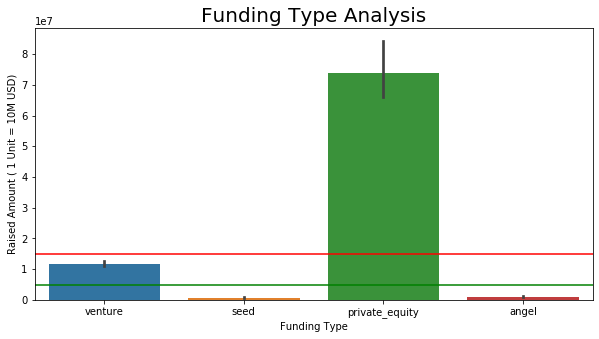

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(x="funding_round_type",y="raised_amount_usd", data = master_frame)
plt.title("Funding Type Analysis",fontsize=20)
plt.xlabel("Funding Type")
plt.ylabel("Raised Amount ( 1 Unit = 10M USD)")
plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

After plotting the graph there is a clear picture that `Venture Funding Type is best suitable for spark fund` taking into the consideration that it want to invest between 5M to 15M USD per investment round.

__2. A plot showing the top 9 countries against the total amount of investments of funding type "Venture".__

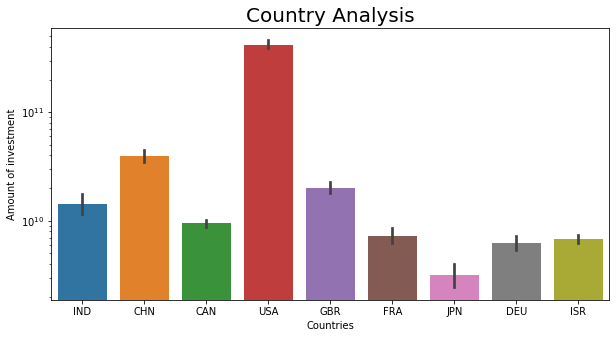

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x="country_code",y="raised_amount_usd",estimator=sum,data=top9)
plt.title("Country Analysis",fontsize=20)
plt.xlabel("Countries")
plt.ylabel("Amount of investment")
plt.yscale("log")
plt.show()

After plotting the graph there is a clear picture that the top 3 english speaking countries are `USA, GRB, IND`.

__3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type "Venture").__

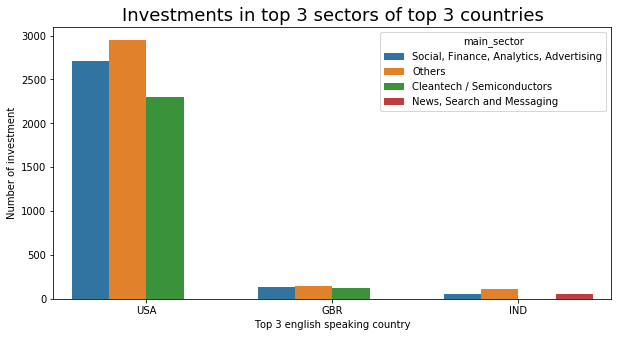

In [77]:
plt.figure(figsize=(10,5))
top3 = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
top3=top3.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])])
top3=top3.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])])
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top3,estimator=lambda x: len(x))
plt.title("Investments in top 3 sectors of top 3 countries",fontsize =18)
plt.xlabel("Top 3 english speaking country")
plt.ylabel("Number of investment")
plt.show()

After plotting the graph there is a clear picture of the `top 3 sectors in each Country`(USA, GRB, IND)